In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
standardized_data=StandardScaler().fit_transform(Xtrain)
standardized_data01=MinMaxScaler().fit_transform(Xtrain)

NameError: name 'Xtrain' is not defined

In [3]:
pwd

'D:\\Yashwanth\\HTW_Berlin\\Semester_1\\Data_Science\\MockTest1'

In [4]:
#TASK 1: importing the train.txt into pandas
df = pd.read_csv("train.txt", sep=" ", header=None)
#df.head(2)

In [5]:
#confirming it has been imported successfully
df.shape

(1666, 101)

In [6]:
X=df.iloc[:, : 100]
X.shape

(1666, 100)

In [7]:
Y=df.iloc[:, 100:]
Y.shape

(1666, 1)

In [8]:
#TASK2
Xtrain, Xval, Ytrain, Yval = train_test_split(X,Y, random_state=17, stratify=Y, test_size=0.2)

In [9]:
Xtrain.shape

(1332, 100)

In [10]:
Xval.shape

(334, 100)

In [11]:
1332+334

1666

In [12]:
df.iloc[:,:1]

,0
0,49.647550
1,32.186724
2,50.527849
3,20.317886
4,42.786827
...,...
1661,45.144444
1662,25.764977
1663,46.225286
1664,67.260014


In [13]:
Y

,100
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1661,0.0
1662,1.0
1663,1.0
1664,0.0


In [17]:
#TASK3: compute correlation of features and class
corr=[np.corrcoef(df.iloc[:,i],Y, rowvar= False)[0,1] for i in range(100)]
corr
#corr[2]

[0.0240926959041569,
 0.03789259818244002,
 0.015385587223773273,
 -0.011940957050891356,
 0.011628497235022656,
 -0.01785501565592527,
 -0.0029615507526595413,
 -0.03766798613798025,
 -0.010577654603837028,
 0.035632582910835334,
 -0.0007103375139155612,
 0.033556917106731504,
 0.01986978974772483,
 0.04152970568922918,
 -0.02808953803073805,
 0.010886601244760341,
 -0.018864493539755396,
 0.004870196534674769,
 -0.006982014376333425,
 0.01106045787716916,
 0.004102194599353981,
 0.04833281879289646,
 0.04294887271623172,
 -0.02051033682570744,
 -0.001827754770809096,
 0.008255600405990845,
 0.04162130598551729,
 0.01752757902506012,
 -0.0271917266120264,
 -0.24071649255811484,
 -0.053819506432213886,
 0.010135643210523675,
 -0.02034920862722291,
 -0.0041425334474379846,
 0.042972194296328176,
 0.043695246627131,
 0.028100525822793463,
 0.015274843553134802,
 -0.034061964813139105,
 0.01211065359682833,
 -0.8416802407015247,
 0.03842857543926507,
 0.0012837720177361575,
 -0.0262581745

In [24]:
#TASK5: find out the most important features (you can do this also after you have trained classifiers)
maxcor=np.argmax(mostimpcorr)
maxcor

0

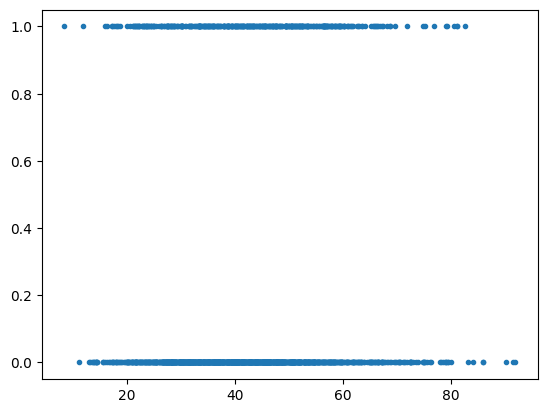

In [148]:
#TASK4: 
plt.plot(X[1],Y,'.')

In [18]:
#TASK5: find out the most important features (you can do this also after you have trained classifiers)
mostimpcorr=np.max(np.min(corr) or np.max(corr))
mostimpcorr

-0.8416802407015247

In [19]:
pca = PCA(n_components=5)
pca.fit(Xtrain)

PCA(n_components=5)

In [20]:
Xtrain.shape

(1332, 100)

In [21]:
#TASK:  visualize the data (apply a meaningful dimensionality reduction if needed)
pcaprojected=pca.transform(Xtrain)
pcaprojected.shape

(1332, 5)

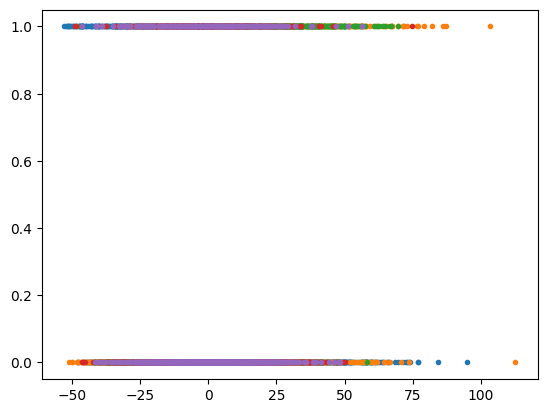

In [22]:
plt.plot(pcaprojected,Ytrain,'.')

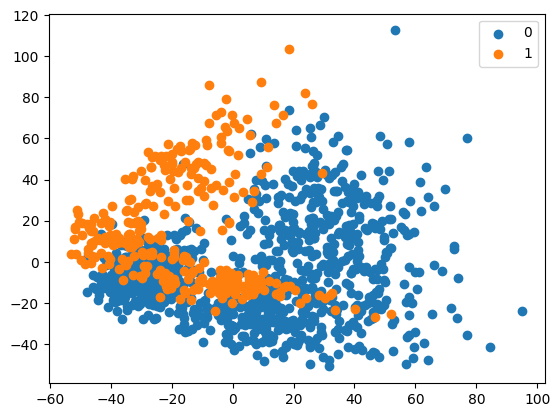

In [23]:
for cls in range(2):
    ix=np.where(Ytrain==cls)[0]
    #plt.scatter(projected[ix,0],projected[ix,1],label=cls) #random projection
    plt.scatter(pcaprojected[ix,0],pcaprojected[ix,1],label=cls)
plt.legend()

In [25]:
z=PCA(n_components=2,whiten=False).fit_transform(standardized_data)
# z=PCA(n_components=2,whiten=False).fit_transform(data01)
plt.scatter(z[:,0],z[:,1],c=Ytrain,alpha=0.3)
plt.colorbar()

NameError: name 'standardized_data' is not defined

C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

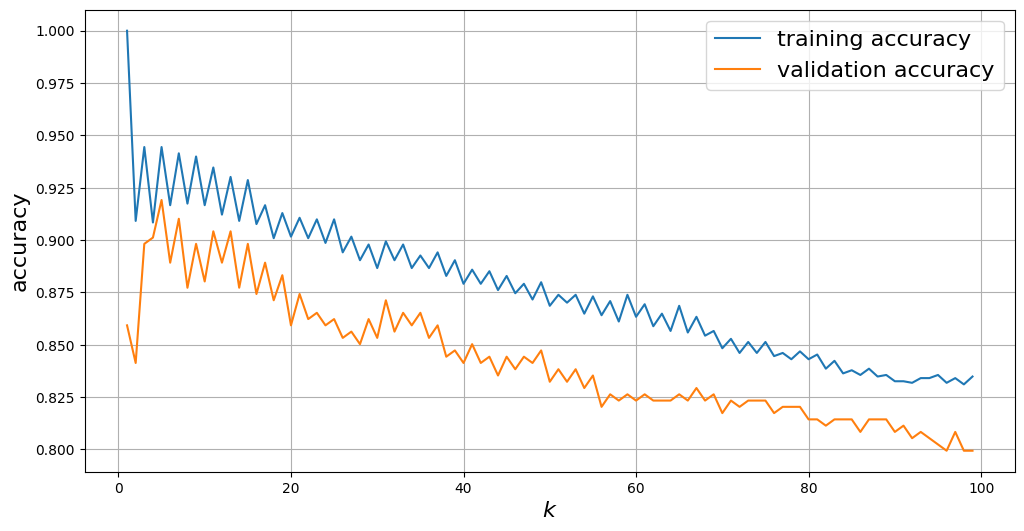

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 100)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, Ytrain)# record training set accuracy
    training_accuracy.append(clf.score(Xtrain, Ytrain)) # record generalization accuracy
    test_accuracy.append(clf.score(Xval, Yval))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="validation accuracy")
plt.ylabel("accuracy", fontsize=16)
plt.xlabel("$k$", fontsize=16)
plt.legend(fontsize=16)
plt.grid(1)
plt.savefig('train_test_accuracy_kNN.png', bbox_inches='tight');
#from here, k=3 seems the best but lot of jump
#can take 10 too because stable around it but less accuracy
#it is a 30 dimensional space so points are very really far.
#k=1 is the best because high accuracy and also stable enough for us

In [27]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(Xtrain, Ytrain)# record training set accuracy
clf.score(Xval, Yval)
#TASK7: build and train a classifier that achieves over 80% accuracy on the test set

C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9191616766467066

In [33]:
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(Xtrain, Ytrain)# record training set accuracy
clf2.score(Xval, Yval)
#TASK7: build and train a classifier that achieves over 80% accuracy on the test set

C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9191616766467066

In [ ]:
#TASK8: 

In [36]:
Ypred = clf2.predict(Xval)

In [38]:
accuracy = accuracy_score(Yval, Ypred)
accuracy

0.9191616766467066

In [39]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score
#accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(Yval, Ypred)

In [40]:
conf_matrix

array([[249,   3],
       [ 24,  58]], dtype=int64)

In [41]:
precision_score(Yval, Ypred)

0.9508196721311475

In [42]:
recall_score(Yval, Ypred)

0.7073170731707317

In [43]:
clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(Xtrain, Ytrain)# record training set accuracy
clf3.score(Xval, Yval)

C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9191616766467066

In [48]:
# Get predicted probabilities on the test set
#[:, 1]
Ypred2 = clf3.predict_proba(Xval)[:, 1]
Ypred2

array([0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0.6, 0. , 0.4, 0. , 0.2, 0. ,
       0.8, 0. , 0.8, 0.2, 0.8, 0. , 0.2, 0.2, 0. , 0.2, 0.4, 0.8, 0. ,
       0. , 0.2, 0. , 0. , 0.4, 0.6, 1. , 0. , 0.2, 0.2, 0. , 1. , 0.8,
       0. , 0. , 0.2, 1. , 0. , 0.4, 0. , 0.6, 0. , 0.4, 0. , 0. , 0. ,
       0.8, 1. , 0. , 0. , 0.6, 0. , 0.2, 0.4, 0. , 0. , 0.8, 0.2, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.6, 0. , 0. , 0.2,
       0. , 0.4, 0. , 0. , 0. , 0. , 0.8, 0. , 0.8, 0. , 0. , 0.2, 0. ,
       1. , 0.8, 0. , 0.4, 0.2, 0. , 0. , 0. , 0.6, 0. , 0.2, 0.6, 0.4,
       0.6, 0.8, 0.8, 0. , 0.2, 0.2, 0.8, 0.4, 0.4, 0. , 0.2, 0.6, 0. ,
       0. , 0. , 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0.8, 0.2, 0.2,
       0. , 0. , 0. , 0.4, 0.2, 0.4, 1. , 0.6, 0. , 0. , 1. , 0.2, 0. ,
       0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0.4, 0.2, 0. , 0.6,
       0.2, 0.8, 0. , 0.8, 0.2, 0.6, 0.6, 0. , 0. , 0. , 0. , 0.

In [45]:
Ypred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [59]:
threshold = 0.01

In [62]:
precision_score(Yval, [Ypred[i] >threshold for i in Ypred])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices